In [1]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2024.03.29


In [2]:
def create_demo_prop_dataset(seed=9999, N=40):
    import numpy as np
    import pandas as pd

    np.random.seed(9999)  # Fix the seed to ensure reproducibility of results.
    # Create samples
    n = 1
    c1 = np.random.binomial(n, 0.2, size=N)
    c2 = np.random.binomial(n, 0.2, size=N)
    c3 = np.random.binomial(n, 0.8, size=N)

    t1 = np.random.binomial(n, 0.6, size=N)
    t2 = np.random.binomial(n, 0.2, size=N)
    t3 = np.random.binomial(n, 0.3, size=N)
    t4 = np.random.binomial(n, 0.4, size=N)
    t5 = np.random.binomial(n, 0.5, size=N)
    t6 = np.random.binomial(n, 0.6, size=N)
    t7 = np.ones(N)
    t8 = np.zeros(N)
    t9 = np.zeros(N)

    # Add a `gender` column for coloring the data.
    females = np.repeat('Female', N / 2).tolist()
    males = np.repeat('Male', N / 2).tolist()
    gender = females + males

    # Add an `id` column for paired data plotting.
    id_col = pd.Series(range(1, N + 1))

    # Combine samples and gender into a DataFrame.
    df = pd.DataFrame({'Control 1': c1, 'Test 1': t1,
                       'Control 2': c2, 'Test 2': t2,
                       'Control 3': c3, 'Test 3': t3,
                       'Test 4': t4, 'Test 5': t5, 'Test 6': t6,
                       'Test 7': t7, 'Test 8': t8, 'Test 9': t9,
                       'Gender': gender, 'ID': id_col
                       })

    return df
df = create_demo_prop_dataset()
df.head()

,Control 1,Test 1,Control 2,Test 2,Control 3,Test 3,Test 4,Test 5,Test 6,Test 7,Test 8,Test 9,Gender,ID
0,1,0,0,0,1,0,0,1,0,1.0,0.0,0.0,Female,1
1,0,1,0,1,1,1,0,0,0,1.0,0.0,0.0,Female,2
2,0,1,0,0,1,0,1,1,0,1.0,0.0,0.0,Female,3
3,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0,Female,4
4,0,0,0,0,1,0,0,0,1,1.0,0.0,0.0,Female,5


In [3]:
sample_size_1 = {'a':[3, 4], 'b':[2, 5]}
sample_size_2 = [3, 4, 2, 5]
names = ['a', 'b']
sample_df_1 = dabest.prop_dataset(sample_size_1)
sample_df_2 = dabest.prop_dataset(sample_size_2, names)
print(all(sample_df_1 == sample_df_2))
sample_df_1.head()

True


,a,b,ID
0,0,0,1
1,0,0,2
2,0,1,3
3,1,1,4
4,1,1,5


In [4]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), proportional=True)

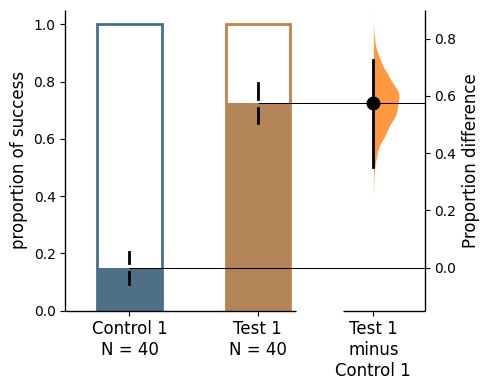

In [5]:
two_groups_unpaired.mean_diff.plot();

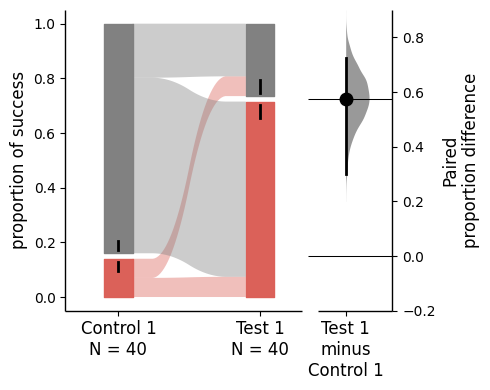

In [6]:
two_groups_baseline = dabest.load(df, idx=("Control 1", "Test 1"), 
                                  proportional=True, paired="baseline", id_col="ID")
    
two_groups_baseline.mean_diff.plot();

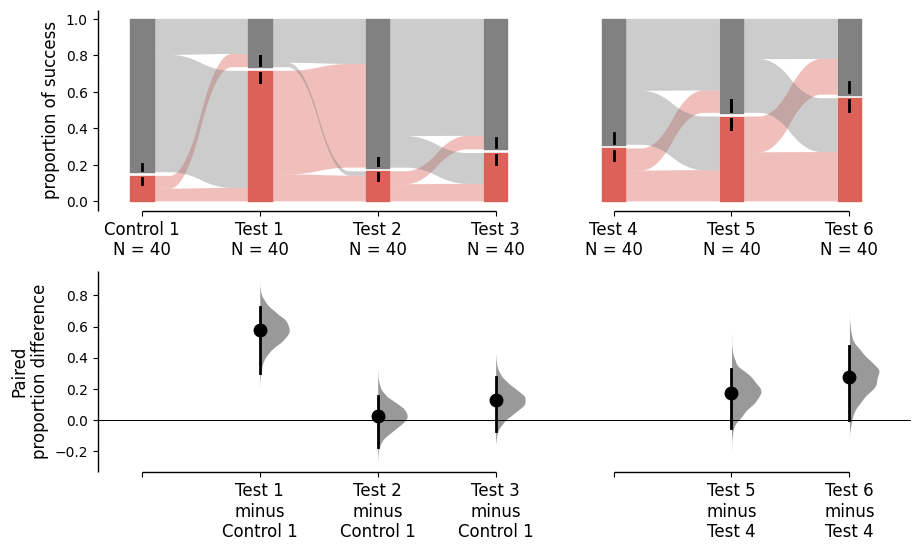

In [7]:
multi_group_baseline = dabest.load(df, idx=((("Control 1", "Test 1","Test 2", "Test 3"),
                                ("Test 4", "Test 5", "Test 6"))),
                    proportional=True, paired="baseline", id_col="ID")

multi_group_baseline.mean_diff.plot();